In [1]:
import seaborn
print(seaborn.__version__)

0.13.1


In [145]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
#import pandas as pd
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
import sys, getopt
from keras import backend as K
import glob
import os
#import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from statsmodels.tsa.seasonal import seasonal_decompose

In [146]:
# Importing required libraries

import pandas as pd, datetime
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from time import time
import os
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import  ARIMA
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score
from pandas import DataFrame
import xgboost as xgb
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

In [147]:
from prophet.diagnostics import cross_validation, performance_metrics

In [148]:
path = r'D:\data\full sale data in csv' # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)


In [149]:
Exchange_rate = pd.read_csv(r'D:\data\sale in csv\Exchange_rate.csv')
Kolkata_temp = pd.read_csv(r'D:\Users\House of Musa\kol_temp.csv')

In [150]:
Exchange_rate['Date'] = pd.to_datetime(Exchange_rate['Date'], format = '%Y-%m-%d')
Exchange_rate
Kolkata_temp['time'] = pd.to_datetime(Kolkata_temp['time'], format = '%Y-%m-%d')
Kolkata_temp.tail()
Exchange_rate.head()

,Date,Price
0,2018-01-01,63.680
1,2018-01-02,63.460
2,2018-01-03,63.505
3,2018-01-04,63.400
4,2018-01-05,63.340


In [151]:
#df['Total_Amt'] = (df['RSP'] * df['Bill_Qty']) - (df['Discount_Amt'])
print(df.Store.unique())

['CITIMART - GARIAHAT' 'CITIMART - HATIBAGAN' 'CITIMART - COOCH BEHAR'
 'CITIMART - CHOWRINGHEE' 'CITIMART -BURDWAN' 'CITIMART - NEW MARKET'
 'CITIMART - LAKE MALL' 'CITIMART -BIDHAN ROAD' nan
 'Newmarket Stock Point' 'Megashop Stock' 'Hatibagan Stockpoint']


In [242]:
#df.tail()

In [153]:
df.DIVISION.unique()

array(['Fmcg Home & Personal Care', 'Fmcg-Food', 'Staples',
       'House Hold Appliences', 'Accoessories', 'Leather Accoessories',
       'Mens', 'Kids', 'Ladies', 'Home Decor', 'Branded Items', 'Raphaaa',
       'Packing', 'Handcraft', 'Winter Garments', nan, 'CMO',
       'Promotional'], dtype=object)

In [243]:
#df.SECTION.unique()

In [155]:
# splitting dataframe by Store location
# grouping by particular dataframe column
grouped = df.groupby(df.Store)
df1_CHOWRINGHEE = grouped.get_group("CITIMART - CHOWRINGHEE")
df1_NEWMARKET = grouped.get_group("CITIMART - NEW MARKET")
df1_HATIBAGAN = grouped.get_group("CITIMART - HATIBAGAN")
df1_GARIAHAT = grouped.get_group("CITIMART - GARIAHAT")

df_CHOWRINGHEE = df1_CHOWRINGHEE.loc[:, ['Bill_Date','SECTION','DIVISION' , 'RSP', 'Bill_Qty', 'Discount_Amt', 'Net_Amt']]
df_NEWMARKET = df1_NEWMARKET.loc[:, ['Bill_Date','SECTION', 'DIVISION' ,  'RSP', 'Bill_Qty', 'Discount_Amt', 'Net_Amt']]
df_HATIBAGAN = df1_HATIBAGAN.loc[:, ['Bill_Date','SECTION', 'DIVISION',  'RSP', 'Bill_Qty', 'Discount_Amt', 'Net_Amt']]
df_GARIAHAT = df1_GARIAHAT.loc[:, ['Bill_Date','SECTION', 'DIVISION',  'RSP', 'Bill_Qty', 'Discount_Amt', 'Net_Amt']]


In [156]:
df_NEWMARKET.tail()

,Bill_Date,SECTION,DIVISION,RSP,Bill_Qty,Discount_Amt,Net_Amt
5993522,2021-12-31,Kids,Winter Garments,549.0,1.0,0.0,549.0
5993523,2021-12-31,Men'S,Winter Garments,1199.0,1.0,0.0,1199.0
5993524,2021-12-31,Men'S,Winter Garments,1299.0,1.0,0.0,1299.0
5993525,2021-12-31,Kids,Winter Garments,799.0,1.0,0.0,799.0
5993526,2021-12-31,Ladies,Winter Garments,799.0,1.0,159.8,639.2


In [157]:
df_CHOWRINGHEE_Div = df_CHOWRINGHEE.groupby(df_CHOWRINGHEE.DIVISION)
df_NEWMARKET_Div = df_NEWMARKET.groupby(df_NEWMARKET.DIVISION)
df_HATIBAGAN_Div = df_HATIBAGAN.groupby(df_HATIBAGAN.DIVISION)

In [158]:
df_CHOWRINGHEE_Sec = df_CHOWRINGHEE.groupby(df_CHOWRINGHEE.SECTION)
df_NEWMARKET_Sec = df_NEWMARKET.groupby(df_NEWMARKET.SECTION)
df_HATIBAGAN_Sec = df_HATIBAGAN.groupby(df_HATIBAGAN.SECTION)

In [159]:
df_f = df_HATIBAGAN_Div
Home_Decor = df_f.get_group('Home Decor')
Accoessories = df_f.get_group('Accoessories')
House_Hold_Appliences = df_f.get_group('House Hold Appliences')
Raphaaa = df_f.get_group('Raphaaa')
Fmcg_Food = df_f.get_group('Fmcg-Food')
Fmcg_Home_Personal_Care = df_f.get_group('Fmcg Home & Personal Care')
Leather_Accoessories = df_f.get_group('Leather Accoessories')
Handcraft = df_f.get_group('Handcraft')
#Mens = df_f.get_group('Mens')
#Ladies =df_f.get_group('Ladies')
#Kids = df_f.get_group('Kids')
#Winter_Garments = df_f.get_group('Winter Garments')
#Branded_Items = df_f.get_group('Branded Items')
#Staples = df_f.get_group('Staples')
#Packing = df_f.get_group('Packing')
#Promotional = df_f.get_group('Promotional')
#CMO = df_f.get_group('CMO')

In [160]:
df_Sec = df_HATIBAGAN_Sec
#MENS
Casual_M = df_Sec.get_group('Casual (M)')
Formal_M = df_Sec.get_group('Formal (M)')
Jeans_M = df_Sec.get_group('Jeans')
Trousers_M = df_Sec.get_group('Trousers (M)')
TShirts_M = df_Sec.get_group('T-Shirts')
Others_M = df_Sec.get_group('Others')
#WinterGarments_M = df_dept.get_group('Winter Garments')
#LADIES
EthnicWear_L = df_Sec.get_group('Ethnic Wear')
Saree_L = df_Sec.get_group('Saree')
WestenWear_L = df_Sec.get_group('Westen Wear')
#KIDS
Boy_K = df_Sec.get_group('Boy')
Girls_K = df_Sec.get_group('Girls')
Others_K = df_Sec.get_group('Others (K)')

In [161]:
#df_CHOWRINGHEE.head()

In [162]:
df1 = df1_CHOWRINGHEE.loc[:, ['Bill_Date', 'RSP', 'Bill_Qty', 'Net_Amt']]


In [244]:
#df1.tail()

In [164]:
df1.isna().sum()

Bill_Date    0
RSP          0
Bill_Qty     0
Net_Amt      0
dtype: int64

In [165]:
df1_sort = df1.sort_values('Bill_Date', ascending=True)


In [166]:
df1['Bill_Date'] = pd.to_datetime(df1['Bill_Date'], format='%Y-%m-%d')

In [167]:
df1_sort = df1.sort_values('Bill_Date', ascending=True)
df1_sort.tail()

,Bill_Date,RSP,Bill_Qty,Net_Amt
1907854,2024-04-30,599.0,1.0,599.0
1907855,2024-04-30,199.0,1.0,199.0
1907856,2024-04-30,199.0,2.0,398.0
1907858,2024-04-30,199.0,2.0,398.0
1908010,2024-04-30,51.0,1.0,45.9


In [168]:
# first create a DataFrame with all dates between specified start<-->end using pd.date_range()
#all_dates = pd.DataFrame(pd.date_range(df1_sort['Bill_Date'].min(), df1_sort['Bill_Date'].max()), columns=['Bill_Date'])

# from the all_dates DataFrame, left join onto the DataFrame with missing dates
#new_df = all_dates.merge(right=df1_sort, how='left', on='Bill_Date')
#print(len(pd.unique(new_df['Bill_Date'])))
#new_df.tail(15)
#new_df.isnull().sum()

In [245]:
df_a = df1_sort.groupby('Bill_Date').agg(Total_Qty=('Bill_Qty', 'sum'),
                            RSP_AVG=('RSP', 'mean'),
                            Net_Amt=('Net_Amt', 'sum')).reset_index().rename(columns={'Bill_Date': 'Bill_Date'})
df_a
#df_exchange = df_a.merge(Exchange_rate, left_on = 'Bill_Date', right_on = 'Date')
#df_ex_temp = df_exchange.merge(Kolkata_temp, left_on = 'Bill_Date', right_on = 'time')
df_f = df_a.loc[:, [ 'Bill_Date', 'Net_Amt', 'Total_Qty', 'RSP_AVG']]
#df_f

In [170]:
df_f.index = pd.to_datetime(df_f.Bill_Date)
df_f
df_daily = df_f.resample('D').agg({"Net_Amt":'sum',"Total_Qty":'sum',"RSP_AVG":'mean'})
df_monthly = df_f.resample('M').agg({"Net_Amt":'sum',"Total_Qty":'sum',"RSP_AVG":'mean'})


In [171]:
df_daily.head(5)

,Net_Amt,Total_Qty,RSP_AVG
Bill_Date,,,
2020-01-01,286810.24,717.0,508.746318
2020-01-02,219617.99,542.0,505.220374
2020-01-03,134004.28,318.0,490.132841
2020-01-04,216566.59,558.0,490.962422
2020-01-05,287944.09,754.0,481.954819


In [172]:
# check number of nan values in dataframe
df_daily.isna().sum()

Net_Amt       0
Total_Qty     0
RSP_AVG      93
dtype: int64

In [173]:
df_daily.mean()

Net_Amt      184097.484994
Total_Qty       547.128319
RSP_AVG         406.807228
dtype: float64

In [174]:
df_f_m = df_daily
#df_f_m.index = pd.to_datetime(df_f_m.Bill_Date)
#df_f_m.head(3)

In [246]:
df_monthly = df_daily.resample('M').agg({"Net_Amt":'sum',"Total_Qty":'sum',"RSP_AVG":'mean'})
#df_monthly

In [176]:
# Data Preparation: input should be float type
df_f_m['Net_Amt'] = df_f_m['Net_Amt'] * 1.0
# Assigning one store from each category
sales_a = df_f_m['Net_Amt']
sales_a.head()

Bill_Date
2020-01-01    286810.24
2020-01-02    219617.99
2020-01-03    134004.28
2020-01-04    216566.59
2020-01-05    287944.09
Freq: D, Name: Net_Amt, dtype: float64

<Axes: xlabel='Bill_Date'>

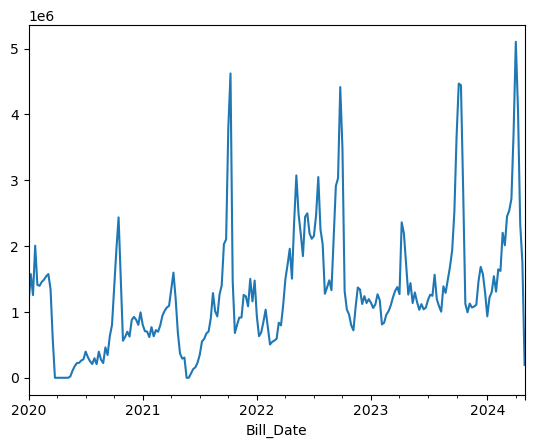

In [177]:
# Trend
sales_a.resample('W').sum().plot()

In [178]:
sales_a.head()

Bill_Date
2020-01-01    286810.24
2020-01-02    219617.99
2020-01-03    134004.28
2020-01-04    216566.59
2020-01-05    287944.09
Freq: D, Name: Net_Amt, dtype: float64

In [179]:
# Creating a train dataset
train_prophet = df_daily.copy()
train_prophet.reset_index(level=0, inplace=True)
train_prophet.head(5)

,Bill_Date,Net_Amt,Total_Qty,RSP_AVG
0,2020-01-01,286810.24,717.0,508.746318
1,2020-01-02,219617.99,542.0,505.220374
2,2020-01-03,134004.28,318.0,490.132841
3,2020-01-04,216566.59,558.0,490.962422
4,2020-01-05,287944.09,754.0,481.954819


In [180]:
# Converting col names to specific names as required by Prophet library
train_prophet = train_prophet.rename(columns = {'Bill_Date': 'ds', 'Net_Amt': 'y'})
#train_prophet = train_prophet.rename(columns = {'Bill_Date': 'ds', 'Total_Qty': 'y'})
train_prophet.head()
#train_prophet.head()

,ds,y,Total_Qty,RSP_AVG
0,2020-01-01,286810.24,717.0,508.746318
1,2020-01-02,219617.99,542.0,505.220374
2,2020-01-03,134004.28,318.0,490.132841
3,2020-01-04,216566.59,558.0,490.962422
4,2020-01-05,287944.09,754.0,481.954819


In [201]:
# Downsampling to week because modelling on daily basis takes a lot of time
ts_week_prophet = train_prophet.set_index("ds").resample("D").sum()
ts_week_prophet.head()

,y,Total_Qty,RSP_AVG
ds,,,
2020-01-01,286810.24,717.0,508.746318
2020-01-02,219617.99,542.0,505.220374
2020-01-03,134004.28,318.0,490.132841
2020-01-04,216566.59,558.0,490.962422
2020-01-05,287944.09,754.0,481.954819


In [202]:
# Handle missing values
ts_week_prophet.fillna(method='ffill', inplace=True)

In [203]:
# Example of adding a holiday effect
holidays = pd.DataFrame({
    'holiday': 'holiday_name',
    'ds': pd.to_datetime(['2020-01-01', '2024-05-31']),
    'lower_window': 0,
    'upper_window': 1,
})

In [204]:
# Resetting the index
ts_week_prophet_train = ts_week_prophet.reset_index()
ts_week_prophet_train.head()

,ds,y,Total_Qty,RSP_AVG
0,2020-01-01,286810.24,717.0,508.746318
1,2020-01-02,219617.99,542.0,505.220374
2,2020-01-03,134004.28,318.0,490.132841
3,2020-01-04,216566.59,558.0,490.962422
4,2020-01-05,287944.09,754.0,481.954819


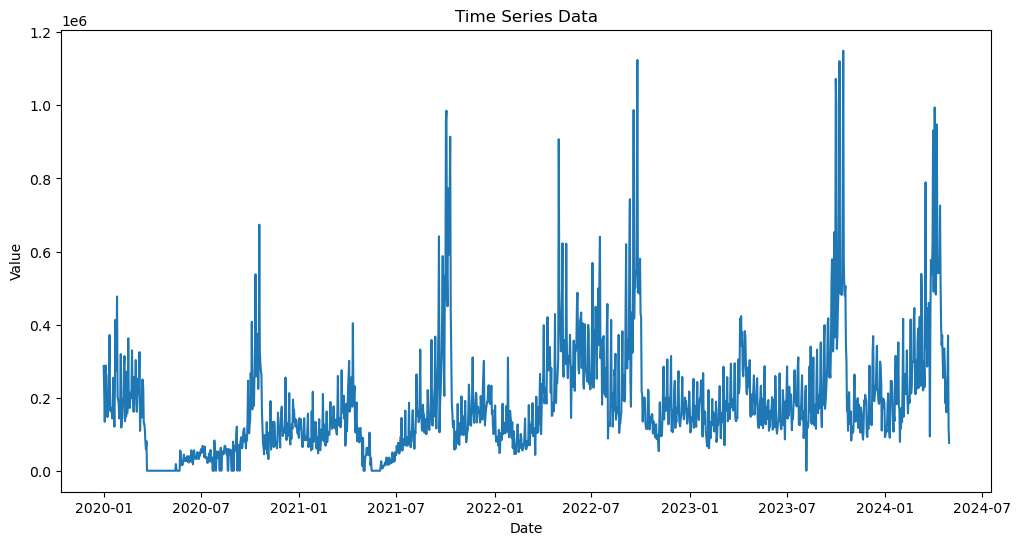

In [205]:
#Outliers visualization

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(ts_week_prophet_train['ds'], ts_week_prophet_train['y'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data')
plt.show()

In [206]:
#Statistical Methods:
#Use statistical methods such as the IQR (Interquartile Range) method or Z-score to detect outliers.

#import numpy as np

Q1 = ts_week_prophet_train['y'].quantile(0.25)
Q3 = ts_week_prophet_train['y'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers = ts_week_prophet_train[(ts_week_prophet_train['y'] < (Q1 - 1.5 * IQR)) | (ts_week_prophet_train['y'] > (Q3 + 1.5 * IQR))]

# Remove outliers
df_clean1 = ts_week_prophet_train[~ts_week_prophet_train.index.isin(outliers.index)]

In [207]:
#Using Z-score:

from scipy import stats

z_scores = np.abs(stats.zscore(ts_week_prophet_train['y']))
outliers = ts_week_prophet_train[z_scores > 3]

# Remove outliers
df_clean2 = ts_week_prophet_train[z_scores <= 3]

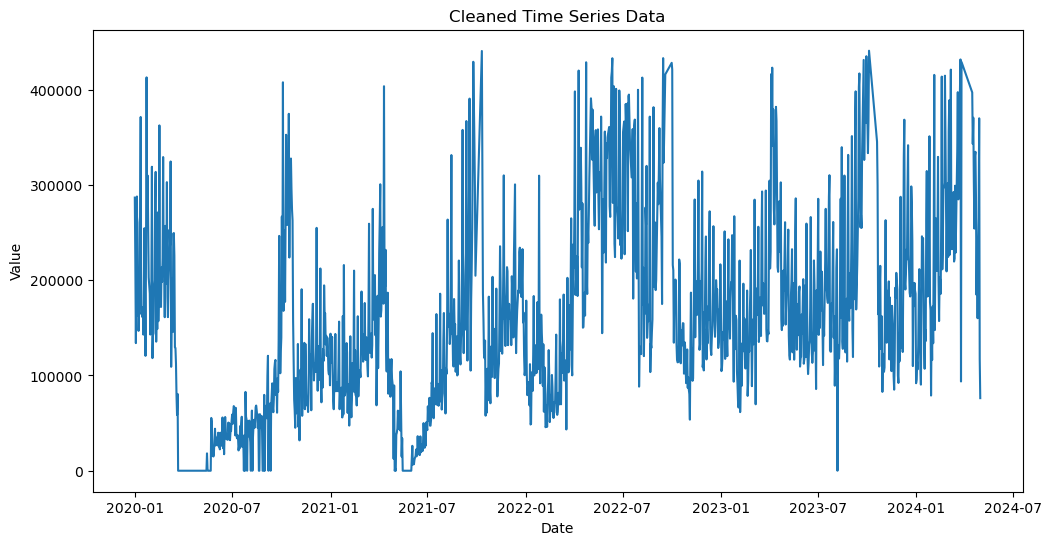

In [208]:
#Replot Cleaned Data:
plt.figure(figsize=(12, 6))
plt.plot(df_clean1['ds'], df_clean1['y'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Cleaned Time Series Data')
plt.show()

In [209]:
#IQR i.e df_clean1 is performing better and giving less errors

In [210]:
df_clean1.head()

,ds,y,Total_Qty,RSP_AVG
0,2020-01-01,286810.24,717.0,508.746318
1,2020-01-02,219617.99,542.0,505.220374
2,2020-01-03,134004.28,318.0,490.132841
3,2020-01-04,216566.59,558.0,490.962422
4,2020-01-05,287944.09,754.0,481.954819


In [191]:
# Normalize the cleaned data
#scaler = MinMaxScaler()  # or StandardScaler()
#df_clean1[['y', 'Total_Qty', 'RSP_AVG']] = scaler.fit_transform(df_clean1[['y', 'Total_Qty', 'RSP_AVG']])

In [255]:
# Initialize scalers
scaler_y = MinMaxScaler()
scaler_features = MinMaxScaler()

# Fit and transform y
df_clean1['y'] = scaler_y.fit_transform(df_clean1[['y']])

# Fit and transform features
df_clean1[['Total_Qty', 'RSP_AVG']] = scaler_features.fit_transform(df_clean1[['Total_Qty', 'RSP_AVG']])

# Debug: Ensure 'ds' column is present after normalization
print(df_clean.columns)

Index(['ds', 'y', 'Total_Qty', 'RSP_AVG'], dtype='object')


In [225]:
#Use this if you are using just on y without any other features
# Normalize the cleaned data
#scaler = MinMaxScaler()  # or StandardScaler()
#df_clean1[['y']] = scaler.fit_transform(df_clean1[['y']])


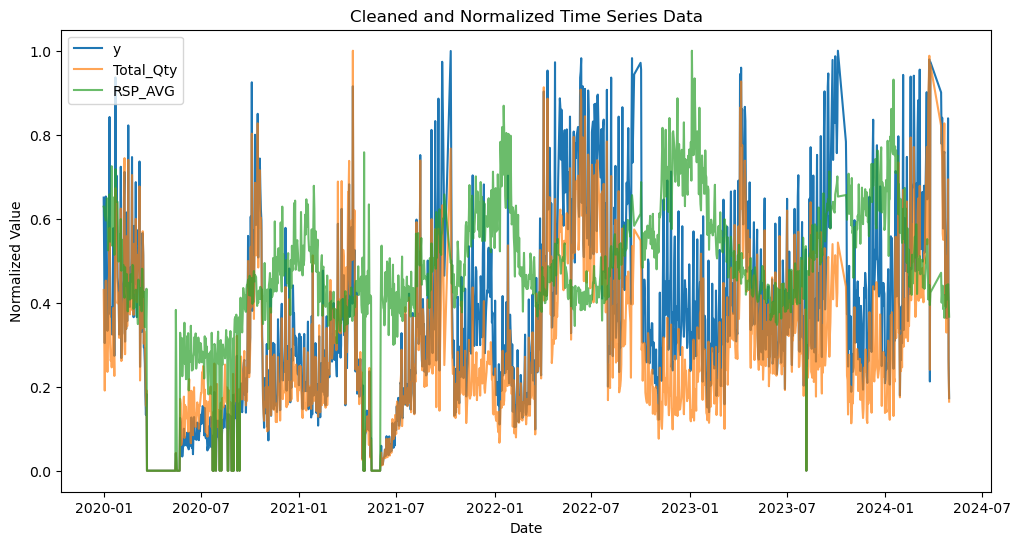

In [226]:
# Visual inspection of cleaned and normalized data
plt.figure(figsize=(12, 6))
plt.plot(df_clean1['ds'], df_clean1['y'], label='y')
plt.plot(df_clean1['ds'], df_clean1['Total_Qty'], label='Total_Qty', alpha=0.7)
plt.plot(df_clean1['ds'], df_clean1['RSP_AVG'], label='RSP_AVG', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title('Cleaned and Normalized Time Series Data')
plt.legend()
plt.show()

In [227]:
# Define hyperparameter grid
param_grid = {
    'changepoint_prior_scale': [0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.1, 1.0, 10.0]
}

In [228]:
# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]

In [229]:
# Initialize a DataFrame to store cross-validation results
results = []


In [230]:
# Perform cross-validation for each parameter combination
for params in all_params:
    model = Prophet(
        holidays=holidays,
        changepoint_prior_scale=params['changepoint_prior_scale'],
        seasonality_prior_scale=params['seasonality_prior_scale']
    )
    model.add_country_holidays(country_name='IN')
    model.add_regressor('Total_Qty')
    model.add_regressor('RSP_AVG')
    model.fit(df_clean1[['ds', 'y', 'Total_Qty', 'RSP_AVG']])
    
    # Perform cross-validation
    df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')
    df_p = performance_metrics(df_cv)
    
    # Store results
    params['rmse'] = df_p['rmse'].values[0]
    results.append(params)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

13:03:04 - cmdstanpy - INFO - Chain [1] start processing
13:03:04 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

13:03:05 - cmdstanpy - INFO - Chain [1] start processing
13:03:05 - cmdstanpy - INFO - Chain [1] done processing
13:03:05 - cmdstanpy - INFO - Chain [1] start processing
13:03:05 - cmdstanpy - INFO - Chain [1] done processing
13:03:06 - cmdstanpy - INFO - Chain [1] start processing
13:03:06 - cmdstanpy - INFO - Chain [1] done processing
13:03:07 - cmdstanpy - INFO - Chain [1] start processing
13:03:07 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

13:03:08 - cmdstanpy - INFO - Chain [1] start processing
13:03:08 - cmdstanpy - INFO - Chain [1] done processing
13:03:08 - cmdstanpy - INFO - Chain [1] start processing
13:03:08 - cmdstanpy - INFO - Chain [1] done processing
13:03:09 - cmdstanpy - INFO - Chain [1] start processing
13:03:09 - cmdstanpy - INFO - Chain [1] done processing
13:03:10 - cmdstanpy - INFO - Chain [1] start processing
13:03:10 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

13:03:11 - cmdstanpy - INFO - Chain [1] start processing
13:03:11 - cmdstanpy - INFO - Chain [1] done processing
13:03:11 - cmdstanpy - INFO - Chain [1] start processing
13:03:11 - cmdstanpy - INFO - Chain [1] done processing
13:03:12 - cmdstanpy - INFO - Chain [1] start processing
13:03:12 - cmdstanpy - INFO - Chain [1] done processing
13:03:13 - cmdstanpy - INFO - Chain [1] start processing
13:03:14 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

13:03:14 - cmdstanpy - INFO - Chain [1] start processing
13:03:14 - cmdstanpy - INFO - Chain [1] done processing
13:03:15 - cmdstanpy - INFO - Chain [1] start processing
13:03:15 - cmdstanpy - INFO - Chain [1] done processing
13:03:15 - cmdstanpy - INFO - Chain [1] start processing
13:03:16 - cmdstanpy - INFO - Chain [1] done processing
13:03:17 - cmdstanpy - INFO - Chain [1] start processing
13:03:17 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

13:03:17 - cmdstanpy - INFO - Chain [1] start processing
13:03:17 - cmdstanpy - INFO - Chain [1] done processing
13:03:18 - cmdstanpy - INFO - Chain [1] start processing
13:03:18 - cmdstanpy - INFO - Chain [1] done processing
13:03:19 - cmdstanpy - INFO - Chain [1] start processing
13:03:19 - cmdstanpy - INFO - Chain [1] done processing
13:03:20 - cmdstanpy - INFO - Chain [1] start processing
13:03:20 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

13:03:20 - cmdstanpy - INFO - Chain [1] start processing
13:03:20 - cmdstanpy - INFO - Chain [1] done processing
13:03:21 - cmdstanpy - INFO - Chain [1] start processing
13:03:21 - cmdstanpy - INFO - Chain [1] done processing
13:03:22 - cmdstanpy - INFO - Chain [1] start processing
13:03:22 - cmdstanpy - INFO - Chain [1] done processing
13:03:23 - cmdstanpy - INFO - Chain [1] start processing
13:03:24 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

13:03:24 - cmdstanpy - INFO - Chain [1] start processing
13:03:25 - cmdstanpy - INFO - Chain [1] done processing
13:03:25 - cmdstanpy - INFO - Chain [1] start processing
13:03:26 - cmdstanpy - INFO - Chain [1] done processing
13:03:26 - cmdstanpy - INFO - Chain [1] start processing
13:03:27 - cmdstanpy - INFO - Chain [1] done processing
13:03:28 - cmdstanpy - INFO - Chain [1] start processing
13:03:29 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

13:03:30 - cmdstanpy - INFO - Chain [1] start processing
13:03:30 - cmdstanpy - INFO - Chain [1] done processing
13:03:31 - cmdstanpy - INFO - Chain [1] start processing
13:03:32 - cmdstanpy - INFO - Chain [1] done processing
13:03:32 - cmdstanpy - INFO - Chain [1] start processing
13:03:33 - cmdstanpy - INFO - Chain [1] done processing
13:03:34 - cmdstanpy - INFO - Chain [1] start processing
13:03:35 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

13:03:35 - cmdstanpy - INFO - Chain [1] start processing
13:03:36 - cmdstanpy - INFO - Chain [1] done processing
13:03:36 - cmdstanpy - INFO - Chain [1] start processing
13:03:37 - cmdstanpy - INFO - Chain [1] done processing
13:03:38 - cmdstanpy - INFO - Chain [1] start processing
13:03:38 - cmdstanpy - INFO - Chain [1] done processing


In [231]:
# Select the best parameters
best_params = results_df.loc[results_df['rmse'].idxmin()].to_dict()

In [232]:
# Train final model with the best parameters
model = Prophet(
    holidays=holidays,
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_params['seasonality_prior_scale']
)
model.add_country_holidays(country_name='IN')
model.add_regressor('Total_Qty')
model.add_regressor('RSP_AVG')
model.fit(df_clean1[['ds', 'y', 'Total_Qty', 'RSP_AVG']])


13:04:21 - cmdstanpy - INFO - Chain [1] start processing
13:04:21 - cmdstanpy - INFO - Chain [1] done processing


In [233]:
# Make future dataframe and include regressors
future = model.make_future_dataframe(periods=365)
future['Total_Qty'] = np.random.normal(70, 5, size=(len(future),)) # Replace with actual future values
future['RSP_AVG'] = np.random.normal(30, 5, size=(len(future),))   # Replace with actual future values

# Normalize the future regressors similarly
future[['Total_Qty', 'RSP_AVG']] = scaler_features.transform(future[['Total_Qty', 'RSP_AVG']])


In [234]:
# Make predictions
forecast = model.predict(future)


In [235]:
# Inverse transform yhat to get it back to the original scale
forecast['yhat'] = scaler_y.inverse_transform(forecast[['yhat']])

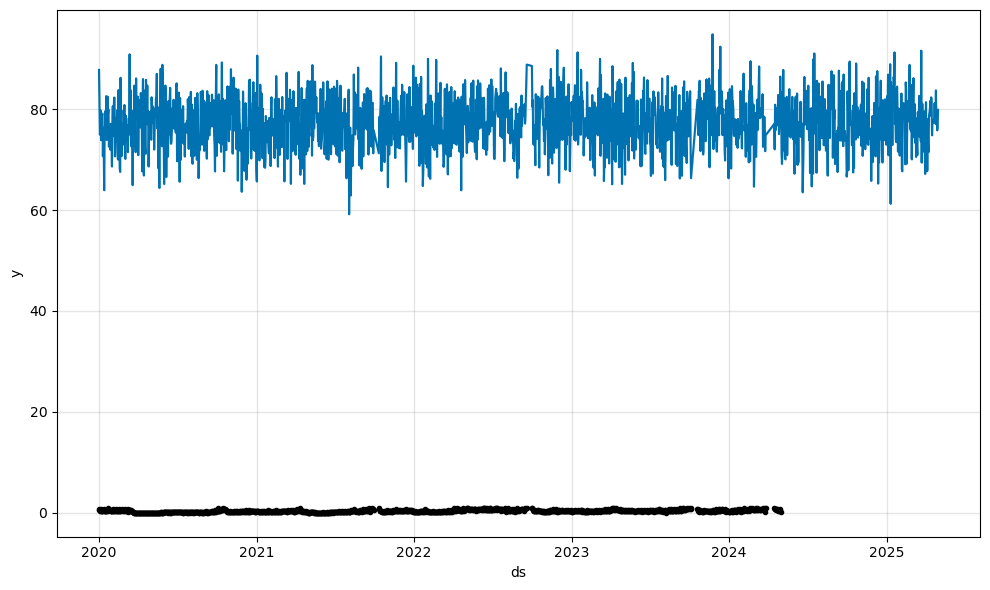

In [236]:
# Plot the forecast
fig = model.plot(forecast)
plt.show()

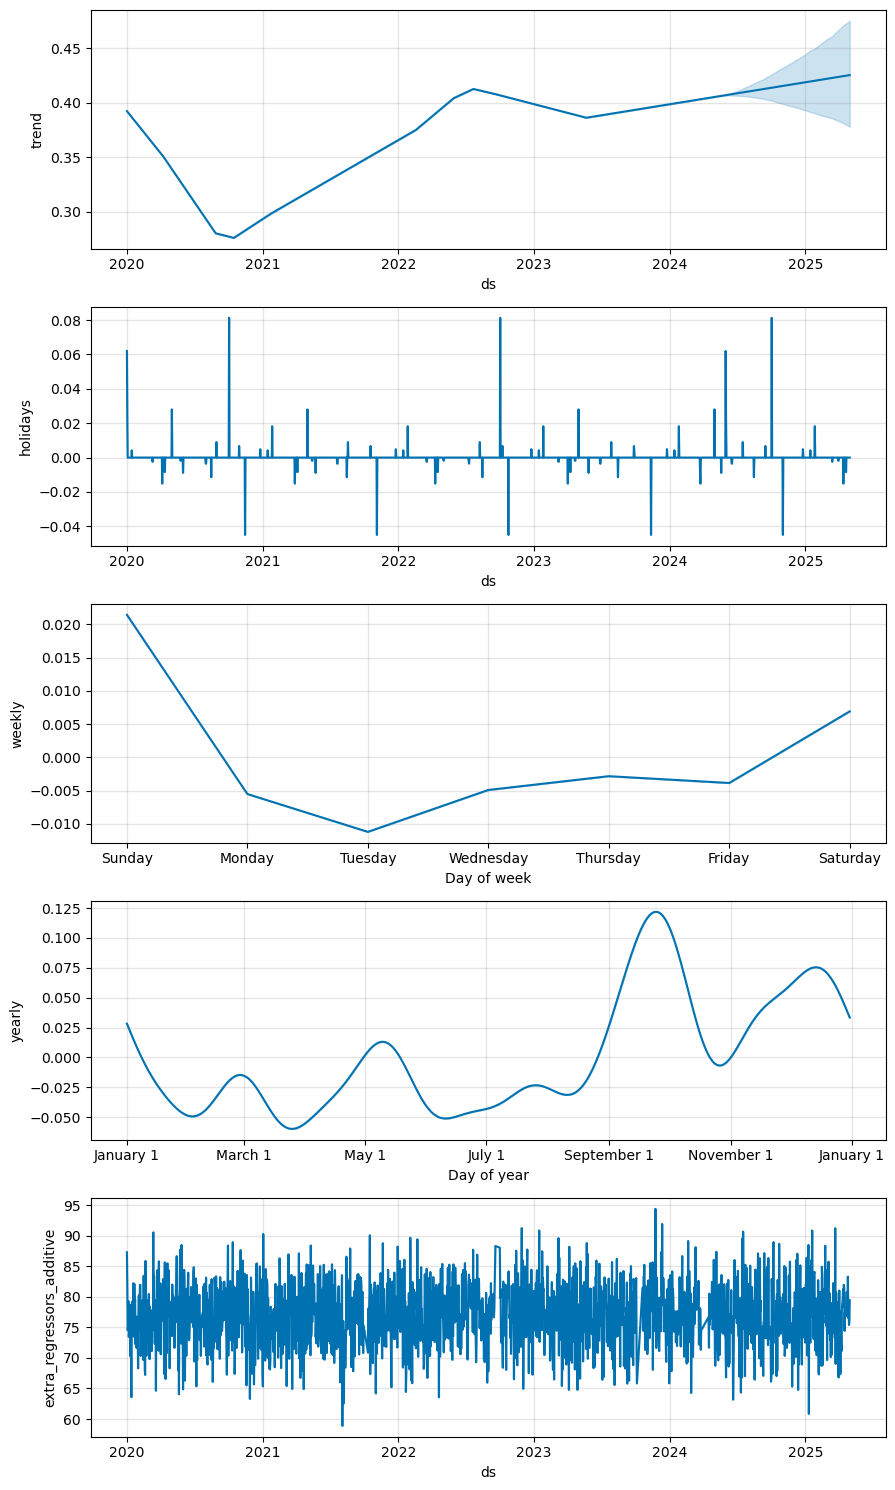

In [237]:
# Plot components
fig_components = model.plot_components(forecast)
plt.show()


In [238]:
# Display the best parameters
print(f"Best parameters: {best_params}")


Best parameters: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.1, 'rmse': 0.0628757992924717}


In [239]:
# Display the performance metrics of the best model
df_cv_best = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')
df_p_best = performance_metrics(df_cv_best)
print(df_p_best)

  0%|          | 0/3 [00:00<?, ?it/s]

13:11:15 - cmdstanpy - INFO - Chain [1] start processing
13:11:15 - cmdstanpy - INFO - Chain [1] done processing
13:11:15 - cmdstanpy - INFO - Chain [1] start processing
13:11:16 - cmdstanpy - INFO - Chain [1] done processing
13:11:16 - cmdstanpy - INFO - Chain [1] start processing
13:11:16 - cmdstanpy - INFO - Chain [1] done processing


     horizon       mse      rmse       mae     mdape     smape  coverage
0    35 days  0.003953  0.062876  0.052594  0.105166  0.126042  0.510000
1    36 days  0.003900  0.062449  0.051961  0.101725  0.119823  0.515000
2    37 days  0.003840  0.061969  0.051378  0.098282  0.116439  0.510000
3    38 days  0.003900  0.062449  0.051897  0.095479  0.116755  0.506667
4    39 days  0.003762  0.061334  0.050382  0.091327  0.113262  0.530000
..       ...       ...       ...       ...       ...       ...       ...
326 361 days  0.015284  0.123629  0.104125  0.158323  0.179026  0.660000
327 362 days  0.015338  0.123846  0.103869  0.155640  0.180794  0.670000
328 363 days  0.015625  0.125001  0.104540  0.155640  0.182635  0.670000
329 364 days  0.016282  0.127600  0.107312  0.167821  0.190155  0.656667
330 365 days  0.016836  0.129755  0.109135  0.173828  0.197062  0.653333

[331 rows x 7 columns]


In [264]:
#forecast.head()